In [24]:
from utils.load import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
load = LoadFeed('./dataset/flotation/', 100)
data = next(iter(load))
data = data.reset_index(drop=True)
data.shape, data.columns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


((5900, 5),
 Index(['StarchFlow', 'AminaFlow', 'OrePulpFlow', 'IronConcentrate',
        'SilicaConcentrate'],
       dtype='object'))

In [29]:
from dpc.dpc_raw import DPC
from indexs.distance import *
dpc = DPC(data)
# dpc.normalize(['StarchFlow', 'AminaFlow', 'OrePulpFlow', 'IronConcentrate', 'SilicaConcentrate'])
dpc.calDis(norm)
pass


In [4]:
from indexs.others import theil
dpc.dis.max()

6295.657088096659

dc: 1
theil: 5.21520401526002
dc: 11
theil: 1.2947142348228402
dc: 21
theil: 0.7115462989653627
dc: 31
theil: 0.55700422057012
dc: 41
theil: 0.48942143294556045
dc: 51
theil: 0.4381192657950874
dc: 61
theil: 0.391336499363782
dc: 71
theil: 0.3669051871031481
dc: 81
theil: 0.3408635844177807
dc: 91
theil: 0.3278730155174831
dc: 101
theil: 0.3167415627460545
dc: 111
theil: 0.30845477332078336
dc: 121
theil: 0.30235684969303495
dc: 131
theil: 0.2965071360839582
dc: 141
theil: 0.2919404440238801
dc: 151
theil: 0.2879525553883833
dc: 161
theil: 0.2843889683524803
dc: 171
theil: 0.2815366591793045
dc: 181
theil: 0.2798962931149486
dc: 191
theil: 0.2776765070834744
dc: 201
theil: 0.2762789479634324
dc: 211
theil: 0.27491435872429165
dc: 221
theil: 0.27394847457424554
dc: 231
theil: 0.27273826415547814
dc: 241
theil: 0.2722853611087862
dc: 251
theil: 0.2712283601232707
dc: 261
theil: 0.27010084001671375
dc: 271
theil: 0.2693689073990912
dc: 281
theil: 0.26901647092784214
dc: 291
theil: 0.26798

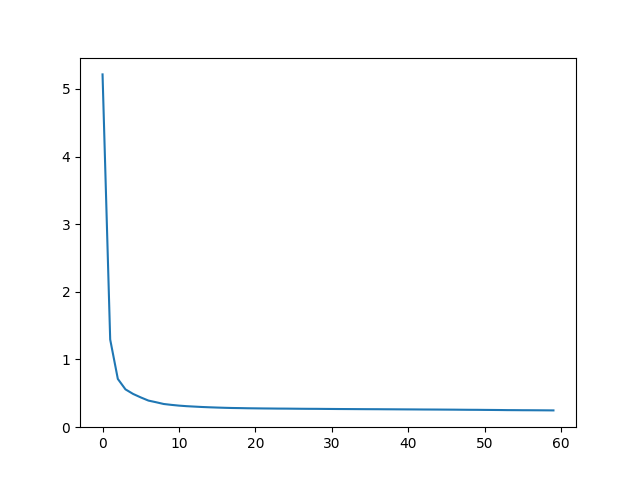

In [6]:
%matplotlib widget
from indexs.others import *
ts = []
for dc in np.arange(1, 600, 10):
    # dpc.calDc(p=i)
    dpc.calRho(dc=dc)
    dpc.calDel()
    dpc.calGam()
    t = theilL(dpc.df.gamma)
    print('theil: '+str(t))
    ts.append(t)


fig, ax = plt.subplots()
ax.plot(ts)
# dpc.df.plot.scatter(x='rho', y='delta')


In [23]:
from indexs.others import theil, bonferroni
print(theil([1, 1, 1, 1, 1]))
print(theil([2, 2, 2, 2, 2]))
print(theil([1, 2, 3, 4, 5]))
print(theil([1, 2, 3, 4, 500]))
print(bonferroni([1, 1, 1, 1, 1]))
print(bonferroni([2, 2, 2, 2, 2]))
print(bonferroni([1, 2, 3, 4, 5]))
print(bonferroni([1, 2, 3, 4, 500]))

0.0
0.0
0.11968759358350925
1.487833770799454


In [108]:
# dpc.calRho(dc=243)
# dpc.calDel()
# dpc.calGam()
# dpc.getCen(3)
dpc.centers = [1893,  970]
dpc.cluster()
pass


In [103]:
dpc.centers

array([1893,  970, 4960])

In [112]:
tmp = dpc.df.copy(deep=True)

In [114]:
from indexs.others import centerIndex
a = tmp.sort_values(by='gamma', ascending=False)
a = a.reset_index(drop=True)
a = a[a.gamma > a.gamma.mean()]

a = centerIndex(a, dpc.dis)


In [115]:
a.wm.max()

1607379.803450714

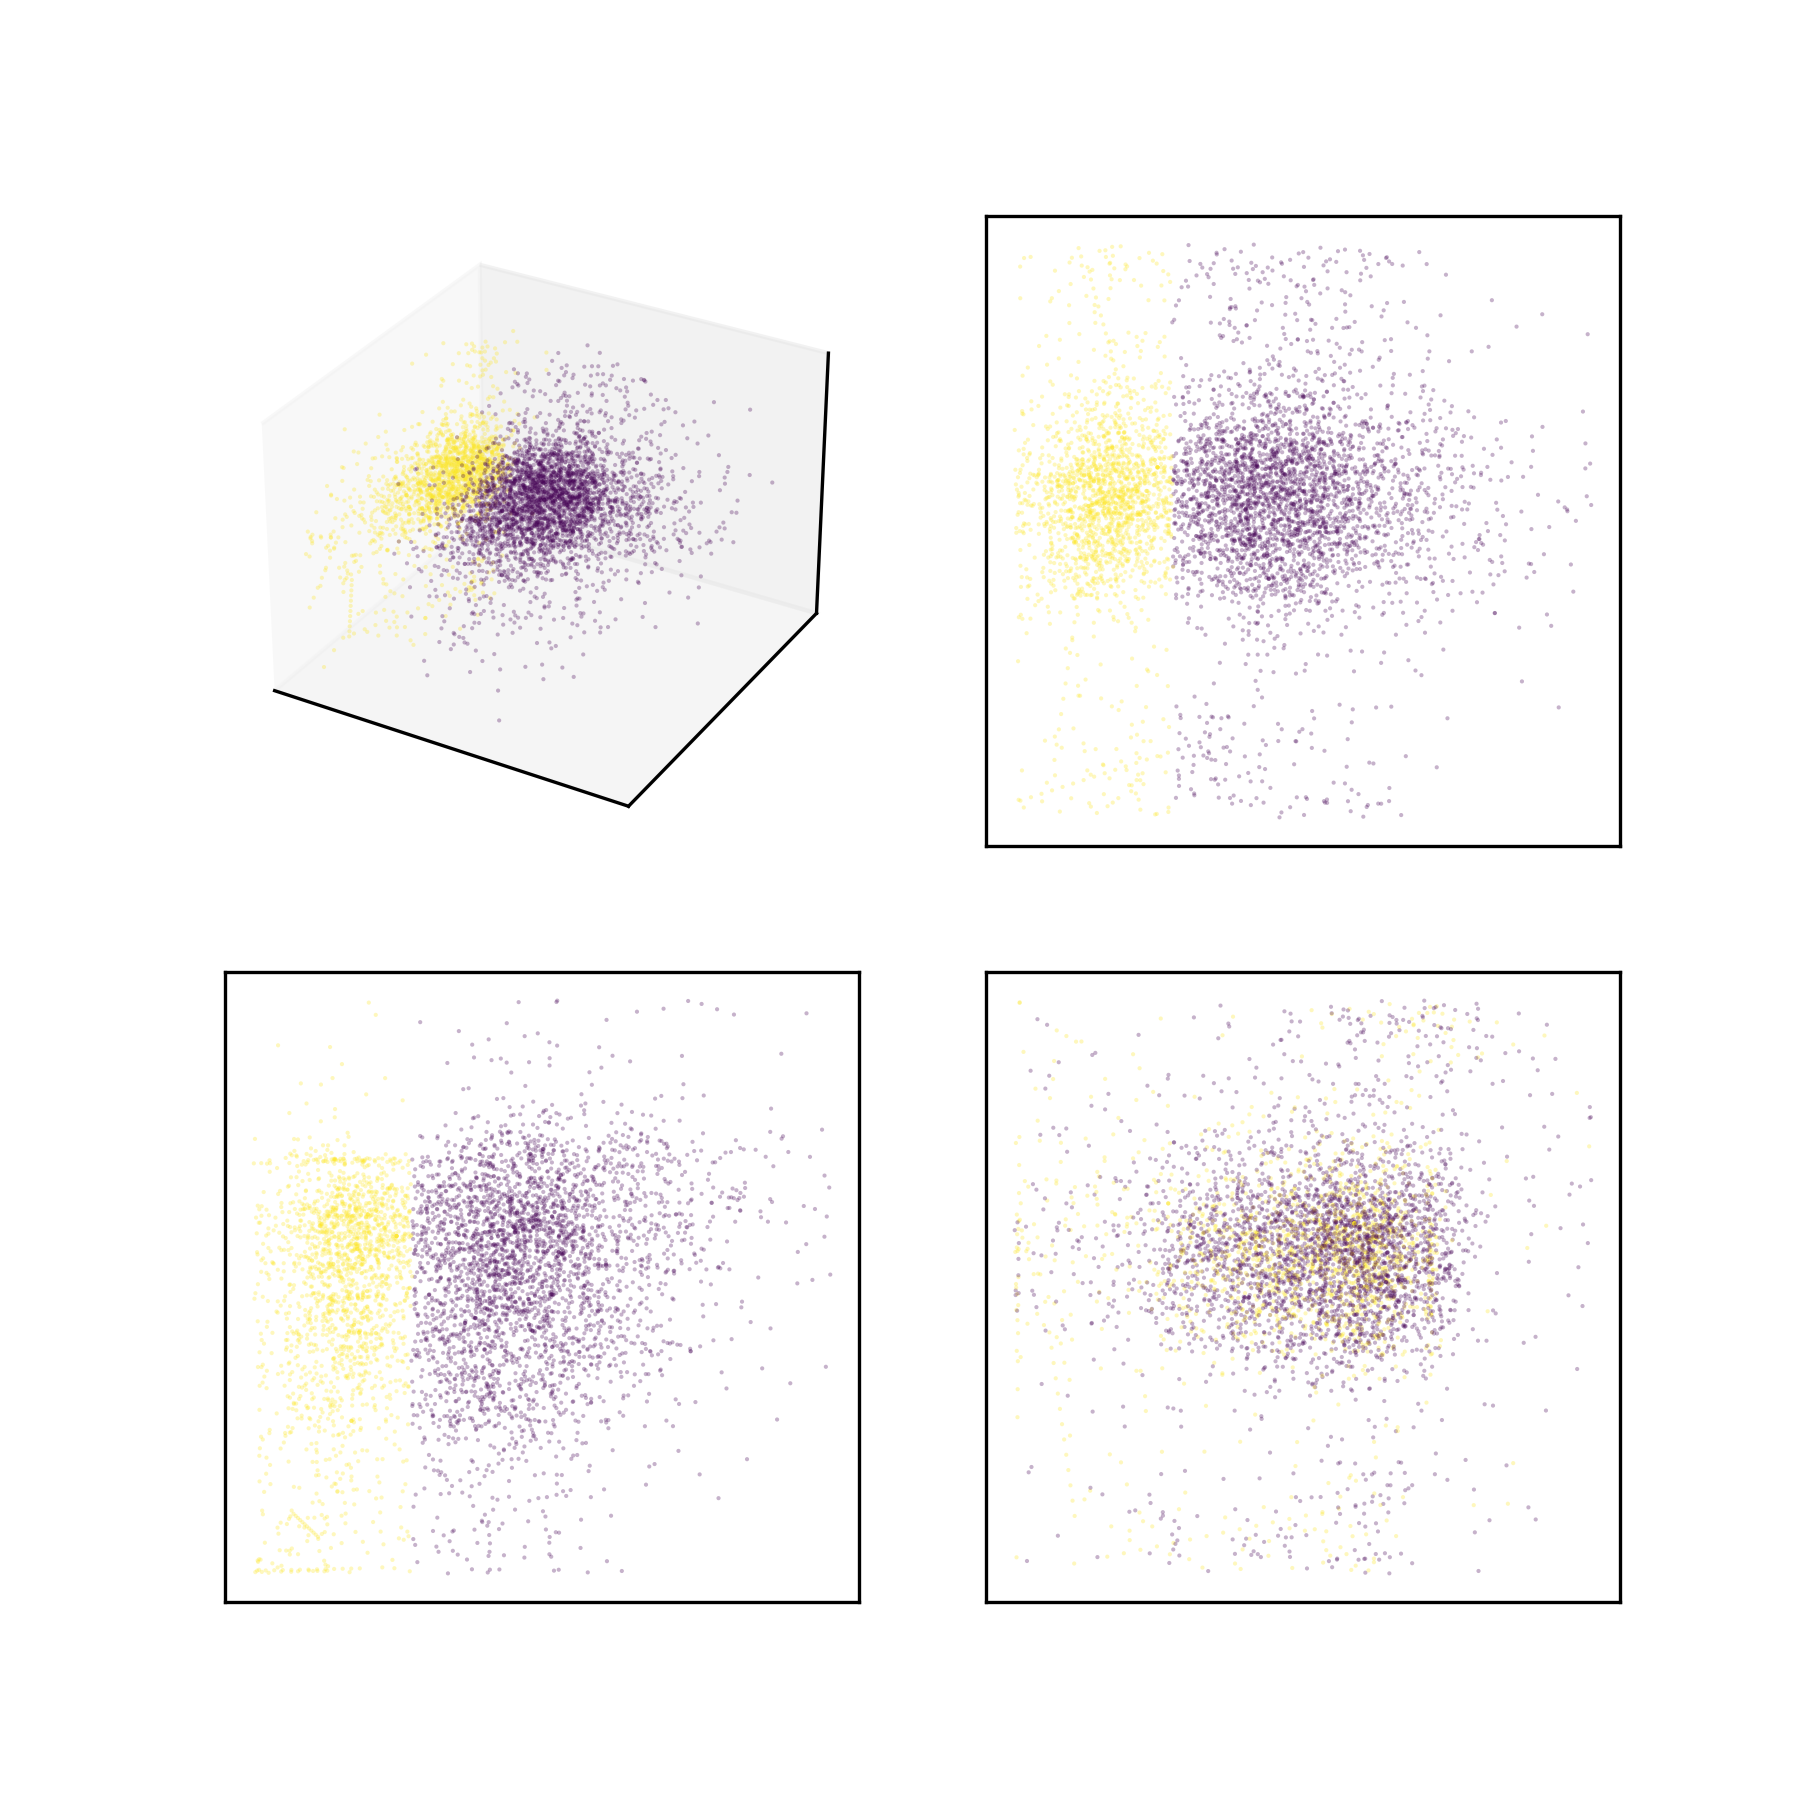

In [109]:

from matplotlib import pyplot as plt
%matplotlib widget
# 画图数据
dataPlot = dpc.df[dpc.df.clusterID != -1]
# 设置图
fig = plt.figure(figsize=(6, 6), dpi=300)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
# 数据显示
# ax1.scatter(dataPlot['StarchFlow'], dataPlot['AminaFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3)
# ax2.scatter(dataPlot['StarchFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3)
# ax3.scatter(dataPlot['StarchFlow'], dataPlot['AminaFlow'], edgecolors='none', s=1, alpha=0.3)
# ax4.scatter(dataPlot['AminaFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3)
# 聚类结果
ax1.scatter(dataPlot['StarchFlow'], dataPlot['AminaFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3, c=dataPlot['clusterID'])
ax2.scatter(dataPlot['StarchFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3, c=dataPlot['clusterID'])
ax3.scatter(dataPlot['StarchFlow'], dataPlot['AminaFlow'], edgecolors='none', s=1, alpha=0.3, c=dataPlot['clusterID'])
ax4.scatter(dataPlot['AminaFlow'], dataPlot['OrePulpFlow'], edgecolors='none', s=1, alpha=0.3, c=dataPlot['clusterID'])
